# ways to solve missing values [numerical data]
mean , median ,mode technique,
constant technique,
Arbitary value technique,
end of distribution,
Random sample technique,

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stat
import sklearn

In [2]:
df = pd.read_csv('./titanic.csv', usecols=['Age','Fare','Survived'])

In [3]:
df.head(10)

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
5,0,14.0,9.2250
6,1,30.0,7.6292
7,0,26.0,29.0000
8,1,18.0,7.2292
9,0,21.0,24.1500


In [4]:
## checking null values

In [5]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [6]:
df['Age'].dtype

dtype('float64')

In [7]:
df['Fare'].dtype

dtype('float64')

In [8]:
df.shape

(418, 3)

In [9]:
df['Age'].isnull().sum()

86

In [10]:
418 -86

332

In [11]:
## filling null values in age colunm with mean median mode technique

In [12]:
mean = df ['Age'].mean()
median  = df['Age'].median()
mode = df['Age'].mode()

In [13]:
mode = df['Age'].mode()[0]
mode

21.0

In [14]:
print(f'the mean values for age colunm = {mean}')
print(f'the mean values for age colunm = {median}')
print(f'the mean values for age colunm = {mode}')

the mean values for age colunm = 30.272590361445783
the mean values for age colunm = 27.0
the mean values for age colunm = 21.0


In [15]:
## for mean

In [16]:
def mean_replacement(df,var,mean):
    return df[var].fillna(mean)

In [17]:
df.loc[:,'Age_mean_replaced'] = mean_replacement(df,'Age',mean)

In [18]:
df.head(10)

,Survived,Age,Fare,Age_mean_replaced
0,0,34.5,7.8292,34.5
1,1,47.0,7.0000,47.0
2,0,62.0,9.6875,62.0
3,0,27.0,8.6625,27.0
4,1,22.0,12.2875,22.0
5,0,14.0,9.2250,14.0
6,1,30.0,7.6292,30.0
7,0,26.0,29.0000,26.0
8,1,18.0,7.2292,18.0
9,0,21.0,24.1500,21.0


In [19]:
## for median

In [20]:
def mean_replacement(df,var,median):
    return df[var].fillna(median)

In [21]:
df.loc[:,'Age_median_replaced'] = mean_replacement(df,'Age',median)

In [22]:
df.tail(5)

,Survived,Age,Fare,Age_mean_replaced,Age_median_replaced
413,0,NaN,8.0500,30.27259,27.0
414,1,39.0,108.9000,39.00000,39.0
415,0,38.5,7.2500,38.50000,38.5
416,0,NaN,8.0500,30.27259,27.0
417,0,NaN,22.3583,30.27259,27.0


In [23]:
## for mode

In [24]:
def mean_replacement(df,var,mode):
    return df[var].fillna(mode)

In [25]:
df.loc[:,'Age_mode_replaced'] = mean_replacement(df,'Age',mode)

In [26]:
df.tail(5)

,Survived,Age,Fare,Age_mean_replaced,Age_median_replaced,Age_mode_replaced
413,0,NaN,8.0500,30.27259,27.0,21.0
414,1,39.0,108.9000,39.00000,39.0,39.0
415,0,38.5,7.2500,38.50000,38.5,38.5
416,0,NaN,8.0500,30.27259,27.0,21.0
417,0,NaN,22.3583,30.27259,27.0,21.0


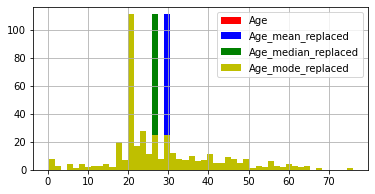

In [27]:
## showing the statistical analysis
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
df['Age'].hist(bins = 50,ax = ax, color ='r',legend = 'Age column')
df['Age_mean_replaced'].hist(bins =50, ax = ax, color ='b',legend = 'Age mean column')
df['Age_median_replaced'].hist(bins = 50,ax = ax, color ='g',legend = 'Age median column')
df['Age_mode_replaced'].hist(bins =50, ax = ax, color ='y',legend = 'Age mode column')
plt.legend(loc =0)
plt.show()

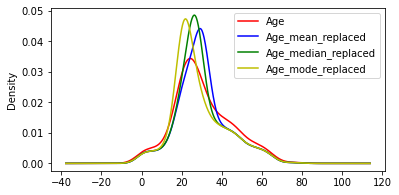

In [28]:
## showing the statistical analysis
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
df['Age'].plot(kind = 'kde',ax = ax, color ='r',legend = 'Age column')
df['Age_mean_replaced'].plot(kind ='kde', ax = ax, color ='b',legend = 'Age mean column')
df['Age_median_replaced'].plot(kind = 'kde',ax = ax, color ='g',legend = 'Age median column')
df['Age_mode_replaced'].plot(kind = 'kde',ax = ax, color ='y',legend = 'Age mode column')
plt.legend(loc =0)
plt.show()

In [29]:
print('the std for age var = ',df['Age'].std())
print('the std for age mean var = ',df['Age_mean_replaced'].std())
print('the std for age median var =',df['Age_median_replaced'].std())
print('the std for age mode var =',df['Age_mode_replaced'].std()) 

the std for age var =  14.18120923562442
the std for age mean var =  12.63453416832505
the std for age median var = 12.703769846333287
the std for age mode var = 13.180116249881022


constant value technique

In [30]:
df.head()

,Survived,Age,Fare,Age_mean_replaced,Age_median_replaced,Age_mode_replaced
0,0,34.5,7.8292,34.5,34.5,34.5
1,1,47.0,7.0000,47.0,47.0,47.0
2,0,62.0,9.6875,62.0,62.0,62.0
3,0,27.0,8.6625,27.0,27.0,27.0
4,1,22.0,12.2875,22.0,22.0,22.0


In [31]:
df['Age_const_var'] =np.where(df['Age'].isnull(),1,0)

In [32]:
df.head()

,Survived,Age,Fare,Age_mean_replaced,Age_median_replaced,Age_mode_replaced,Age_const_var
0,0,34.5,7.8292,34.5,34.5,34.5,0
1,1,47.0,7.0000,47.0,47.0,47.0,0
2,0,62.0,9.6875,62.0,62.0,62.0,0
3,0,27.0,8.6625,27.0,27.0,27.0,0
4,1,22.0,12.2875,22.0,22.0,22.0,0


In [33]:
df.tail()

,Survived,Age,Fare,Age_mean_replaced,Age_median_replaced,Age_mode_replaced,Age_const_var
413,0,NaN,8.0500,30.27259,27.0,21.0,1
414,1,39.0,108.9000,39.00000,39.0,39.0,0
415,0,38.5,7.2500,38.50000,38.5,38.5,0
416,0,NaN,8.0500,30.27259,27.0,21.0,1
417,0,NaN,22.3583,30.27259,27.0,21.0,1


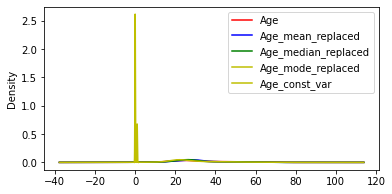

In [34]:
## showing the statistical analysis
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
df['Age'].plot(kind = 'kde',ax = ax, color ='r',legend = 'Age column')
df['Age_mean_replaced'].plot(kind ='kde', ax = ax, color ='b',legend = 'Age mean column')
df['Age_median_replaced'].plot(kind = 'kde',ax = ax, color ='g',legend = 'Age median column')
df['Age_mode_replaced'].plot(kind = 'kde',ax = ax, color ='y',legend = 'Age mode column')
df['Age_const_var'].plot(kind = 'kde',ax = ax, color ='y',legend = 'Age mode column')
plt.legend(loc =0)
plt.show()

In [35]:
print('the std for age var = ',df['Age'].std())
print('the std for age mean var = ',df['Age_mean_replaced'].std())
print('the std for age median var =',df['Age_median_replaced'].std())
print('the std for age mode var =',df['Age_mode_replaced'].std()) 
print('the std for age const var =',df['Age_const_var'].std()) 

the std for age var =  14.18120923562442
the std for age mean var =  12.63453416832505
the std for age median var = 12.703769846333287
the std for age mode var = 13.180116249881022
the std for age const var = 0.40472692660801274


## Arbiratry technique

In [36]:
df.head()

,Survived,Age,Fare,Age_mean_replaced,Age_median_replaced,Age_mode_replaced,Age_const_var
0,0,34.5,7.8292,34.5,34.5,34.5,0
1,1,47.0,7.0000,47.0,47.0,47.0,0
2,0,62.0,9.6875,62.0,62.0,62.0,0
3,0,27.0,8.6625,27.0,27.0,27.0,0
4,1,22.0,12.2875,22.0,22.0,22.0,0


In [37]:
## mostly used values are 1,999,-1,1000

In [38]:
df['Arbitary_value_var'] =df['Age'].fillna(999)

In [39]:
df.tail()

,Survived,Age,Fare,Age_mean_replaced,Age_median_replaced,Age_mode_replaced,Age_const_var,Arbitary_value_var
413,0,NaN,8.0500,30.27259,27.0,21.0,1,999.0
414,1,39.0,108.9000,39.00000,39.0,39.0,0,39.0
415,0,38.5,7.2500,38.50000,38.5,38.5,0,38.5
416,0,NaN,8.0500,30.27259,27.0,21.0,1,999.0
417,0,NaN,22.3583,30.27259,27.0,21.0,1,999.0


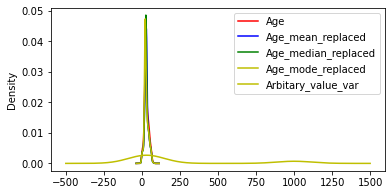

In [40]:
## showing the statistical analysis
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
df['Age'].plot(kind = 'kde',ax = ax, color ='r',legend = 'Age column')
df['Age_mean_replaced'].plot(kind ='kde', ax = ax, color ='b',legend = 'Age mean column')
df['Age_median_replaced'].plot(kind = 'kde',ax = ax, color ='g',legend = 'Age median column')
df['Age_mode_replaced'].plot(kind = 'kde',ax = ax, color ='y',legend = 'Age mode column')

df['Arbitary_value_var'].plot(kind = 'kde',ax = ax, color ='y',legend = 'Age arbitary column')
plt.legend(loc =0)
plt.show()

In [41]:
print('the std for age var = ',df['Age'].std())
print('the std for age mean var = ',df['Age_mean_replaced'].std())
print('the std for age median var =',df['Age_median_replaced'].std())
print('the std for age mode var =',df['Age_mode_replaced'].std()) 
print('the std for age const var =',df['Age_const_var'].std()) 


the std for age var =  14.18120923562442
the std for age mean var =  12.63453416832505
the std for age median var = 12.703769846333287
the std for age mode var = 13.180116249881022
the std for age const var = 0.40472692660801274


## End of distribution

<AxesSubplot:>

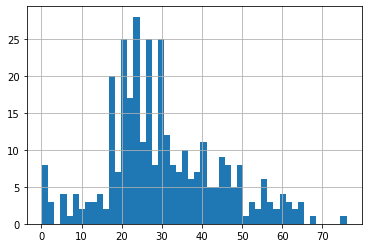

In [42]:
df['Age'].hist(bins = 50)

In [43]:
value = df['Age'].mean()+ 3* df['Age'].std()
value

72.81621806831905

In [44]:
df['Eod techniqe'] = df['Age'].fillna(value)

In [45]:
df.tail()

,Survived,Age,Fare,Age_mean_replaced,Age_median_replaced,Age_mode_replaced,Age_const_var,Arbitary_value_var,Eod techniqe
413,0,NaN,8.0500,30.27259,27.0,21.0,1,999.0,72.816218
414,1,39.0,108.9000,39.00000,39.0,39.0,0,39.0,39.000000
415,0,38.5,7.2500,38.50000,38.5,38.5,0,38.5,38.500000
416,0,NaN,8.0500,30.27259,27.0,21.0,1,999.0,72.816218
417,0,NaN,22.3583,30.27259,27.0,21.0,1,999.0,72.816218


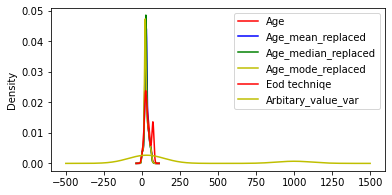

In [46]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
df['Age'].plot(kind = 'kde',ax = ax, color ='r',legend = 'Age column')
df['Age_mean_replaced'].plot(kind ='kde', ax = ax, color ='b',legend = 'Age mean column')
df['Age_median_replaced'].plot(kind = 'kde',ax = ax, color ='g',legend = 'Age median column')
df['Age_mode_replaced'].plot(kind = 'kde',ax = ax, color ='y',legend = 'Age mode column')
df['Eod techniqe'].plot(kind = 'kde',ax=ax,color='r',legend ='Age Eod techniqe')
df['Arbitary_value_var'].plot(kind = 'kde',ax = ax, color ='y',legend = 'Age arbitary column')
plt.legend(loc =0)
plt.show()

In [47]:
print('the std for age var = ',df['Age'].std())
print('the std for age mean var = ',df['Age_mean_replaced'].std())
print('the std for age median var =',df['Age_median_replaced'].std())
print('the std for age mode var =',df['Age_mode_replaced'].std()) 
print('the std for age const var =',df['Age_const_var'].std()) 
print('the std for age Eod technique =',df['Eod techniqe'].std())
print('the std for age Arbitary_value_var',df['Arbitary_value_var'].std())

the std for age var =  14.18120923562442
the std for age mean var =  12.63453416832505
the std for age median var = 12.703769846333287
the std for age mode var = 13.180116249881022
the std for age const var = 0.40472692660801274
the std for age Eod technique = 21.356731395560693
the std for age Arbitary_value_var 392.2735895604572


## Random sample technique

In [48]:
df['Age'].dropna().sample(3)

126    22.0
197    18.0
40     39.0
Name: Age, dtype: float64

In [49]:
df['Age'].sample(5)

12     23.0
191     NaN
336    32.0
350    45.0
279    22.0
Name: Age, dtype: float64

In [50]:
s= df['Age'].dropna().sample(86)

In [51]:
s

174    40.0
343    58.0
52     20.0
125    17.0
379     5.0
       ... 
415    38.5
311    22.0
72     29.0
13     63.0
80      6.0
Name: Age, Length: 86, dtype: float64

In [52]:
s.index ## this index is for randamly collected value

Int64Index([174, 343,  52, 125, 379,  61, 207, 197, 230, 235, 144, 104, 287,
             99, 204, 229, 175, 134, 236, 176, 180, 250, 137,  53,   7, 210,
             79, 279, 356,  55, 296, 165,  34, 345, 300, 120, 126, 394, 293,
            307, 391, 202, 213, 154,   8, 221,   2, 390, 364, 242,  86, 281,
            164,  73, 337, 387,  74, 351,  97, 113, 354, 381,  63,  43, 397,
            247, 324, 334, 393, 388, 152, 376,  75, 179, 238, 261, 181, 398,
            136, 269,  35, 415, 311,  72,  13,  80],
           dtype='int64')

In [53]:
## collecting index for null values

df[df['Age'].isnull()].index

Int64Index([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
             84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
            132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
            199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
            256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
            292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
            380, 382, 384, 408, 410, 413, 416, 417],
           dtype='int64')

In [54]:
df['Age'][22]

nan

In [55]:
x = df[df['Age'].isnull()].head(1)

In [56]:
x

,Survived,Age,Fare,Age_mean_replaced,Age_median_replaced,Age_mode_replaced,Age_const_var,Arbitary_value_var,Eod techniqe
10,0,NaN,7.8958,30.27259,27.0,21.0,1,999.0,72.816218


In [57]:
s = df['Age'].dropna().sample(1 ,random_state = 42)
s

27    22.5
Name: Age, dtype: float64

In [58]:
s.index 

Int64Index([27], dtype='int64')

In [59]:
s.index = [10]

In [60]:
s.index

Int64Index([10], dtype='int64')

In [61]:
df['samll_value'] = s

In [62]:
x = df[df['Age'].isnull()].head(1)

In [63]:
x

,Survived,Age,Fare,Age_mean_replaced,Age_median_replaced,Age_mode_replaced,Age_const_var,Arbitary_value_var,Eod techniqe,samll_value
10,0,NaN,7.8958,30.27259,27.0,21.0,1,999.0,72.816218,22.5


In [64]:
def random_sample_technique(df,var):
    df[var+'_random_replaced'] =df[var].copy()
    s = df[var].dropna().sample(df[var].isnull().sum(), random_state =42)
    s.index = df[df['Age'].isnull()].index
    df.loc[df['Age'].isnull(),'Age_random_replaced'] =s

In [65]:
random_sample_technique(df,'Age')

In [66]:
df.tail()

,Survived,Age,Fare,Age_mean_replaced,Age_median_replaced,Age_mode_replaced,Age_const_var,Arbitary_value_var,Eod techniqe,samll_value,Age_random_replaced
413,0,NaN,8.0500,30.27259,27.0,21.0,1,999.0,72.816218,NaN,36.0
414,1,39.0,108.9000,39.00000,39.0,39.0,0,39.0,39.000000,NaN,39.0
415,0,38.5,7.2500,38.50000,38.5,38.5,0,38.5,38.500000,NaN,38.5
416,0,NaN,8.0500,30.27259,27.0,21.0,1,999.0,72.816218,NaN,47.0
417,0,NaN,22.3583,30.27259,27.0,21.0,1,999.0,72.816218,NaN,48.0


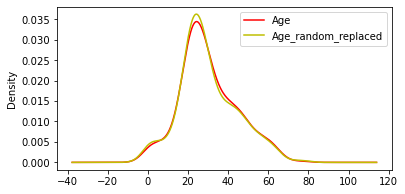

In [67]:
## showing the statistical analysis
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
df['Age'].plot(kind = 'kde',ax = ax, color ='r',legend = 'Age column')
#df['Age_mean_replaced'].plot(kind ='kde', ax = ax, color ='b',legend = 'Age mean column')
#df['Age_median_replaced'].plot(kind = 'kde',ax = ax, color ='g',legend = 'Age median column')
#df['Age_mode_replaced'].plot(kind = 'kde',ax = ax, color ='y',legend = 'Age mode column')
#df['Age_const_var'].plot(kind = 'kde',ax = ax, color ='y',legend = 'Age mode column')
df['Age_random_replaced'].plot(kind = 'kde',ax = ax, color = 'y',legend = 'Age random colunm')
plt.legend(loc =0)
plt.show()

In [72]:
print('the std for age var = ',df['Age'].std())
#print('the std for age mean var = ',df['Age_mean_replaced'].std())
#print('the std for age median var =',df['Age_median_replaced'].std())
#print('the std for age mode var =',df['Age_mode_replaced'].std()) 
#print('the std for age const var =',df['Age_const_var'].std()) 
#print('the std for age Eod technique =',df['Eod techniqe'].std())
#print('the std for age Arbitary_value_var',df['Arbitary_value_var'].std())
print('the std for age const var = ',df['Age_random_replaced'].std())

the std for age var =  14.18120923562442
the std for age const var =  14.316950260832423
